Name: Natasha Kayla Cahyadi

NIM: 2702235891

Class: LB09 - Machine Learning


# Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import shapiro
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Data Prepraration

In [2]:
# Read the Data
df = pd.read_csv('1A.tsv', delimiter='\t')

In [3]:
# Display the Data
df.head()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,2023/11/07,D-penicillamine,1966/03/07,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4
1,2,2012/08/16,D-penicillamine,1968/07/01,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3
2,3,2022/03/05,D-penicillamine,1954/11/15,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4
3,4,2019/09/04,D-penicillamine,1970/03/16,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4
4,5,2020/10/29,Placebo,1986/11/03,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3


In [4]:
# Display the data
df.tail()

,ID,Registration Date,Drug,Birth Date,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,2023/01/30,NaN,1957/12/11,F,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,-1.0,174.0,10.9,stage_3
414,415,2021/12/04,NaN,1985/12/11,F,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,-1.0,180.0,11.2,Stage4
415,416,2022/01/21,NaN,1967/12/12,F,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,-1.0,143.0,9.9,stage_3
416,417,2023/01/20,NaN,1966/12/11,F,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,-1.0,269.0,10.4,stage_3
417,418,2022/04/10,NaN,1971/12/12,F,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,-1.0,350.0,10.6,Stage4


In [5]:
df.shape

(418, 18)

In [6]:
# Show data columns
df.columns

Index(['ID', 'Registration Date', 'Drug', 'Birth Date', 'Gender', 'Ascites',
       'Hepatomegaly', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin',
       'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides',
       'Platelets', 'Prothrombin', 'Stage'],
      dtype='object')

In [7]:
# Show info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         418 non-null    int64  
 1   Registration Date          418 non-null    object 
 2   Drug                       312 non-null    object 
 3   Birth Date                 418 non-null    object 
 4   Gender                     418 non-null    object 
 5   Ascites                    312 non-null    object 
 6   Hepatomegaly               312 non-null    object 
 7   Edema                      418 non-null    object 
 8   Bilirubin                  418 non-null    float64
 9   Cholesterol                80 non-null     float64
 10  Albumin                    418 non-null    float64
 11  Copper                     310 non-null    float64
 12  Alkaline Phospatase (U/L)  312 non-null    float64
 13  SGOT                       312 non-null    float64

**Variable in this dataset :**
- ID, data type : int
- Registration Date, data type : object
- Drug, data type : object
- Birth Date, data type : object
- Gender, data type : object
- Ascites, data type : object
- Hepatomegaly, data type : object
- Edema, data type : object
- Bilirubin, data type : float
- Cholesterol, data type : float
- Albumin, data type : float
- Copper, data type : float
- Alkaline Phospatase (U/L), data type : float
- SGOT, data type : float
- Tryglicerides, data type : float
- Platelets, data type : float
- Prothrombin, data type : float
- Stage, data type : object

**Range Index :** 418 entries

**Number of Columns :** 18

**Memory Usage :** 58.9+ KB

In [8]:
# Show statistics descriptive
df.describe()

,ID,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,80.000000,418.000000,310.000000,312.000000,312.000000,418.000000,407.000000,416.000000
mean,209.500000,3.220813,358.662500,3.497440,97.648387,1982.655769,122.556346,83.803828,257.024570,10.731731
std,120.810458,4.407506,230.414099,0.424972,85.613920,2140.388824,56.699525,79.603693,98.325585,1.022000
min,1.000000,0.300000,149.000000,1.960000,4.000000,289.000000,26.350000,-1.000000,62.000000,9.000000
25%,105.250000,0.800000,236.000000,3.242500,41.250000,871.500000,80.600000,-1.000000,188.500000,10.000000
50%,209.500000,1.400000,284.500000,3.530000,73.000000,1259.000000,114.700000,85.000000,251.000000,10.600000
75%,313.750000,3.400000,409.500000,3.770000,123.000000,1980.000000,151.900000,127.750000,318.000000,11.100000
max,418.000000,28.000000,1480.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


In [9]:
# Show unique number
df.nunique()

ID                           418
Registration Date            399
Drug                           5
Birth Date                   344
Gender                         2
Ascites                        2
Hepatomegaly                   2
Edema                          3
Bilirubin                     98
Cholesterol                   69
Albumin                      154
Copper                       158
Alkaline Phospatase (U/L)    295
SGOT                         179
Tryglicerides                147
Platelets                    243
Prothrombin                   48
Stage                          4
dtype: int64

**ID** have **the most** unique number because ID is an **identifier**. So, it should have different number in each row. Besided of that, **Registration Date** and **Birth Date** have **a lot of** unique number too because those columns are **spesific** to a particular individual.

# Data Preprocessing

## Add Age Column

In [10]:
# Convert 'Birth Date' column to datetime format
df['Birth Date'] = pd.to_datetime(df['Birth Date'])

# Function to calculate age
def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

# Apply the function to create a new 'age' column
df['Age'] = df['Birth Date'].apply(calculate_age)

# Drop 'Birth Date' column
df.drop(columns=['Birth Date'], inplace=True)

Add **Age** column based on the **Birth Date** column because age is **more relevant** for analysis because it is directly **related** to predictions. Beside of that, age have **simplier format** (numeric) than birth date (categorical). 

In [11]:
# Display the Data
df.head()

,ID,Registration Date,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,1,2023/11/07,D-penicillamine,F,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage4,58
1,2,2012/08/16,D-penicillamine,F,N,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,stage_3,56
2,3,2022/03/05,D-penicillamine,M,N,N,S,1.4,NaN,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage4,70
3,4,2019/09/04,D-penicillamine,F,N,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage4,54
4,5,2020/10/29,Placebo,F,N,Y,N,3.4,NaN,3.53,143.0,671.0,113.15,72.0,136.0,10.9,stage_3,38


## Drop Identifier

In [12]:
# Drop ID and Registration Date because ID and Registration Date are unique values
df.drop(columns=['ID', 'Registration Date'], inplace=True)

Drop **ID and Registration Date** because they contain unique values. Identifier columns are not necessary when building a model.

## Handle Missing Values

In [13]:
# Show duplicated data
df.duplicated().sum()

0

There is **no duplicated** in this dataset.

In [14]:
# Show missing values for each variables
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
data_types = df.dtypes
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Missing Percentage': missing_percentage, 'Data Type': data_types})
missing_data = missing_data.sort_values(by=['Missing Percentage'], ascending=False)
missing_data.style

,Missing Values,Missing Percentage,Data Type
Cholesterol,338,80.861244,float64
Copper,108,25.837321,float64
Drug,106,25.358852,object
Ascites,106,25.358852,object
Hepatomegaly,106,25.358852,object
Alkaline Phospatase (U/L),106,25.358852,float64
SGOT,106,25.358852,float64
Platelets,11,2.631579,float64
Stage,6,1.435407,object
Prothrombin,2,0.478469,float64


- The **Cholesterol** column has **338 missing values**, accounting for approximately **80.86%** of the dataset.
- The **Copper** column has **108 missing values**, accounting for approximately **25.83%** of the dataset.
- **Drug, Ascites, Hepatomegaly, Alkaline Phospatase (U/L), and SGOT** columns have **106 missing values**, accounting for approximately **25.35%** of the dataset.
- The **Platelets** column has **11 missing values**, accounting for approximately **2.63%** of the dataset.
- The **Stage** column has **6 missing values**, accounting for approximately **1.43%** of the dataset.
- The **Prothrombin** column has **2 missing values**, accounting for approximately **0.47%** of the dataset.


In [15]:
# Check MCAR
subset = df[['Drug', 'Ascites', 'Hepatomegaly', 'Cholesterol', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Platelets', 'Prothrombin', 'Stage']].copy()
# Create a "missing" column to identify rows with missing values
subset.loc[:, 'missing'] = subset.isnull().any(axis=1)  # Use `.loc` to assign the new column

# chi-squared
for feature in ['Drug', 'Ascites', 'Hepatomegaly', 'Cholesterol', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Platelets', 'Prothrombin', 'Stage']:
    contingency_table = pd.crosstab(subset['missing'], subset[feature])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-squared test for {feature}:")
    print(f"Chi-squared statistic: {chi2}")
    print(f"P-value: {p}")

# results
    alpha = 0.05 # tolerance
    if p < alpha:
        print(f"Reject the null hypothesis: Missing data in {feature} is not MCAR.")
    else:
        print(f"Fail to reject the null hypothesis: Missing data in {feature} is likely MCAR.")
    print("-" * 20)

Chi-squared test for Drug:
Chi-squared statistic: 3.452473818045342
P-value: 0.48514150276173507
Fail to reject the null hypothesis: Missing data in Drug is likely MCAR.
--------------------
Chi-squared test for Ascites:
Chi-squared statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis: Missing data in Ascites is likely MCAR.
--------------------
Chi-squared test for Hepatomegaly:
Chi-squared statistic: 0.2748699722359624
P-value: 0.6000835044105802
Fail to reject the null hypothesis: Missing data in Hepatomegaly is likely MCAR.
--------------------
Chi-squared test for Cholesterol:
Chi-squared statistic: 39.493670886075954
P-value: 0.9977871214436039
Fail to reject the null hypothesis: Missing data in Cholesterol is likely MCAR.
--------------------
Chi-squared test for Copper:
Chi-squared statistic: 156.33187989426688
P-value: 0.5000442149828457
Fail to reject the null hypothesis: Missing data in Copper is likely MCAR.
--------------------
Chi-squared test for Alkaline Phosp

Since the missing values are **MCAR (Missing Completely at Random)**, the absence of data is **not dependent** on the value of the variable itself or any other variable in the dataset. Therefore, it is **acceptable** to either **remove the missing data** or **replace it with the mean or median** for numerical and **mode** for categorical.

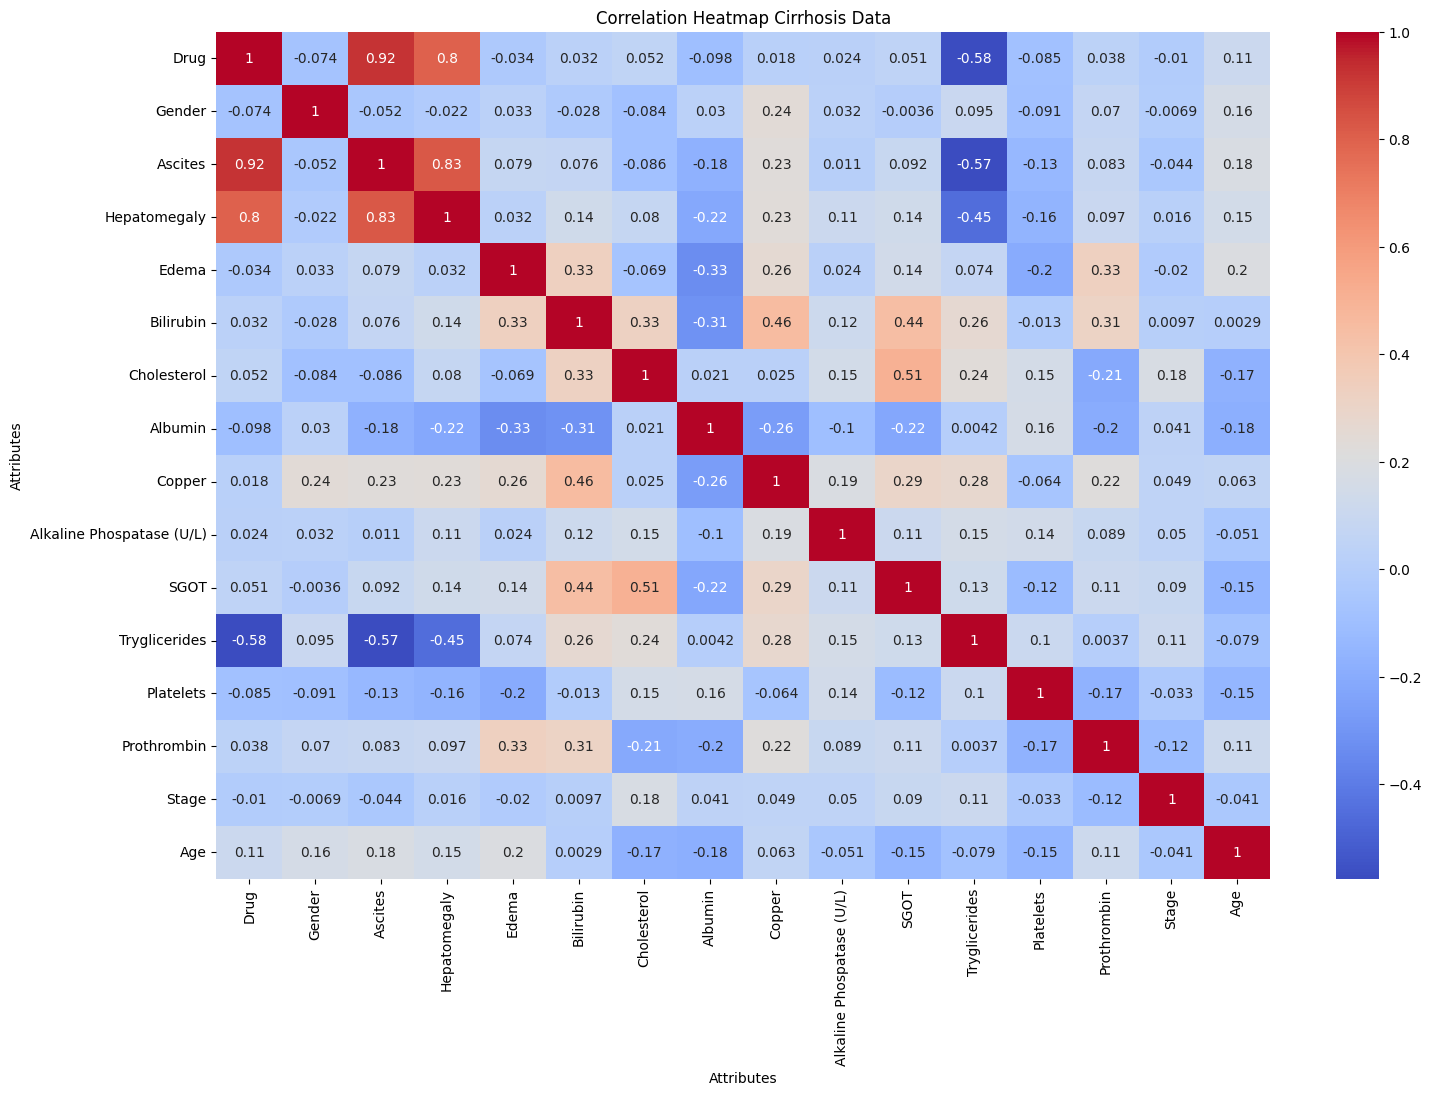

In [16]:
# Heatmap
data = df.copy()

bin_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = bin_enc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Cirrhosis Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

### Removing Missing Values

In [17]:
# Drop 'Cholesterol' column
df.drop(columns=['Cholesterol'], inplace=True)

Drop the **Cholesterol** column since missing values in that column is about **80.86% missing values**, which is a **very large** percentage.

In [18]:
# Drop NA 
df.dropna(inplace=True)

Drop rows with missing values in columns other than **Cholesterol** (since the columns being dropped still have a **high correlation** with other columns, so the entire column should not be removed. Additionally, these are **medical values**, so they should not be imputed).

# Exploratory Data Analysis (EDA)

In [19]:
# Make an empty variable to store categorical and numerical columns
categorical_columns = []
numerical_columns = []

# Looping to divide categorical and numerical, then store it to an empty variable that we've made
for i in df.columns:
    if 'int' in str(df[i].dtype) or 'float' in str(df[i].dtype):
        numerical_columns.append(i)
    else:
        categorical_columns.append(i)

# Display the categorical and numerical columns
print(f'Categorical: {categorical_columns}')
print(f'Numeric: {numerical_columns}')

Categorical: ['Drug', 'Gender', 'Ascites', 'Hepatomegaly', 'Edema', 'Stage']
Numeric: ['Bilirubin', 'Albumin', 'Copper', 'Alkaline Phospatase (U/L)', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Age']


We divided the variables into **categorical** and **numerical** to simplify our process.

In [20]:
# Count the categorical values in each columns
for i in categorical_columns:
    print(df[i].value_counts(),'\n')

Drug
D-penicillamine    152
Placebo            149
d-penicillamine      3
placebo              1
lacebo               1
Name: count, dtype: int64 

Gender
F    271
M     35
Name: count, dtype: int64 

Ascites
N    283
Y     23
Name: count, dtype: int64 

Hepatomegaly
Y    156
N    150
Name: count, dtype: int64 

Edema
N    258
S     28
Y     20
Name: count, dtype: int64 

Stage
stage_3    118
Stage4     108
Stage 2     65
Stage 1     15
Name: count, dtype: int64 



The anomalies in the **Drug** column are likely due to **inconsistencies in capitalization and spelling**. For example:
- "D-penicillamine" vs. "d-penicillamine" differ in capitalization.
- "Placebo" vs. "placebo" also differ in capitalization.
- "lacebo" is likely a typo of "Placebo".

For the **Stage** column, the anomalies arise from **inconsistent naming formats**, such as:
- "Stage_3" uses an **underscore**, while others like "Stage 1" and "Stage 2" use a space.
- "Stage4" has **no space or separator**.

## Handle the Anomalies

In [21]:
# Standardize entries (convert to lowercase and correct typos)
df['Drug'] = df['Drug'].str.lower().replace({
    'd-penicillamine': 'd-penicillamine',
    'lacebo': 'placebo'
})

# Count occurrences of each drug
drug_counts = df['Drug'].value_counts()
print(drug_counts)

Drug
d-penicillamine    155
placebo            151
Name: count, dtype: int64


In [22]:
# Standardize stage names to the format 'Stage X'
df['Stage'] = df['Stage'].str.replace(r'[_]', ' ', regex=True)  
df['Stage'] = df['Stage'].str.strip()                          
df['Stage'] = df['Stage'].str.replace(r'\s+', ' ', regex=True)  
df['Stage'] = df['Stage'].str.title()                          
df['Stage'] = df['Stage'].str.replace(r'Stage\s*(\d+)', r'Stage \1', regex=True)  

# Count occurrences of each stage
stage_counts = df['Stage'].value_counts()
print(stage_counts)

Stage
Stage 3    118
Stage 4    108
Stage 2     65
Stage 1     15
Name: count, dtype: int64


## Heatmap

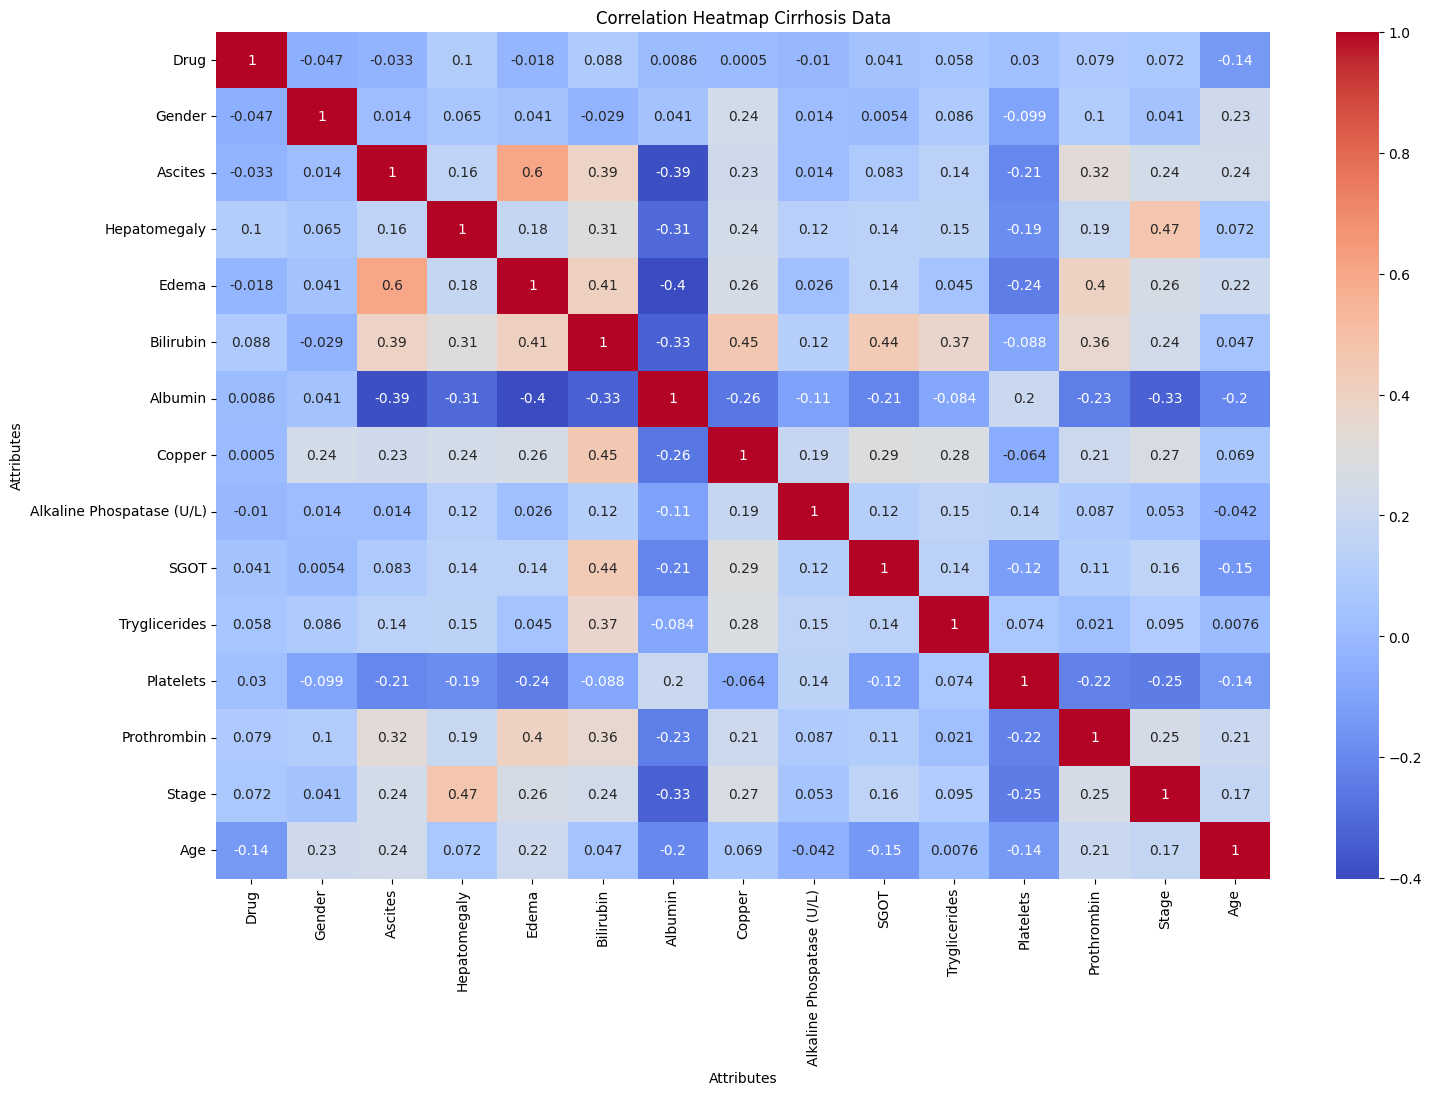

In [23]:
# Heatmap after drop NA and 'Cholesterol' column
data = df.copy()

bin_enc = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = bin_enc.fit_transform(data[col].astype(str))

correlation_matrix_all = data.corr()

plt.figure(figsize=(17, 11))
sns.heatmap(correlation_matrix_all, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap Cirrhosis Data")
plt.xlabel("Attributes")
plt.ylabel("Attributes")
plt.show()

It can be observed that most columns have a **low correlation** with the Stage column. However, there's no need to drop them, as algorithms like Random Forest and XGBoost can capture **non-linear relationships**. Therefore, even columns with low correlation can still be used. The **highest correlation** with Stage is Hepatomegaly (0.47) and the **lowest correlation** with Stage is Gender (0.041).

## Check Distribution

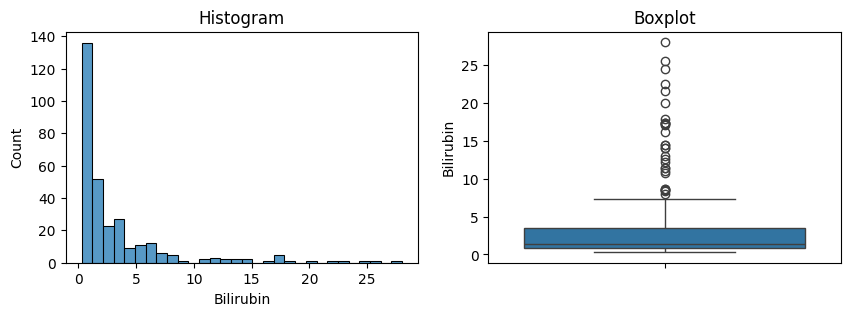

Skewness: 2.817540214492091
Kurtosis: 8.680667490516994


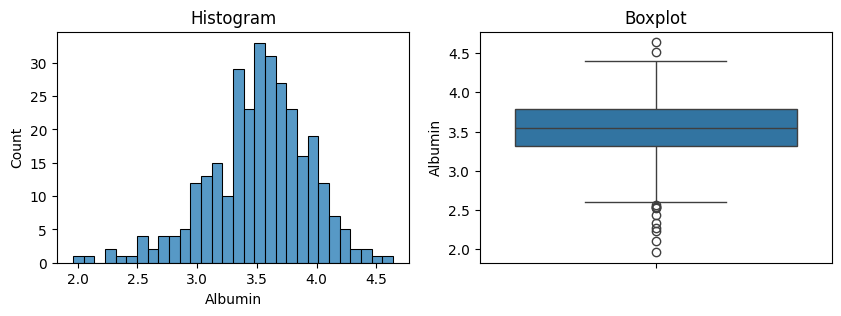

Skewness: -0.5782674450898165
Kurtosis: 0.9638761384912069


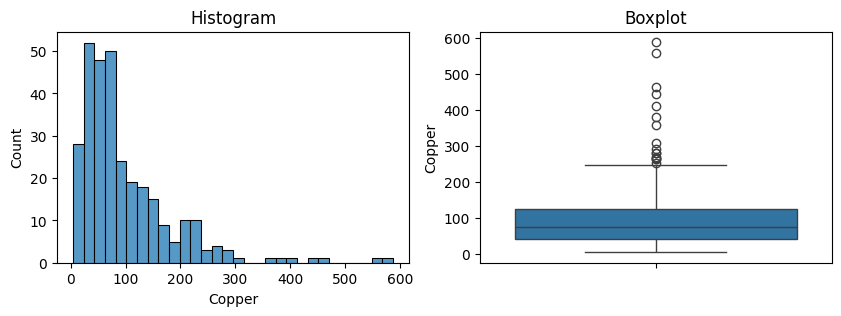

Skewness: 2.2856431823652814
Kurtosis: 7.515563507128517


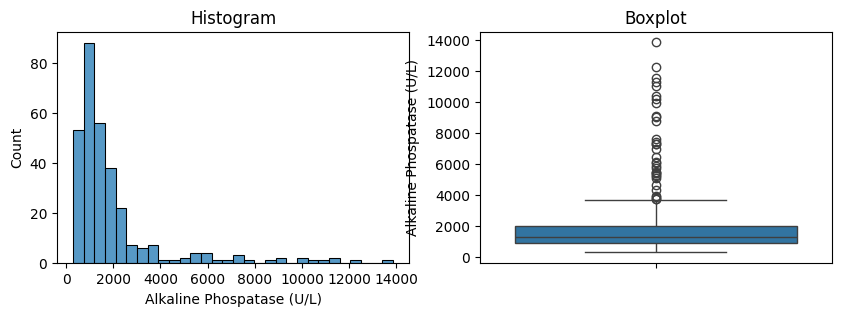

Skewness: 3.005139813159215
Kurtosis: 9.723126571888724


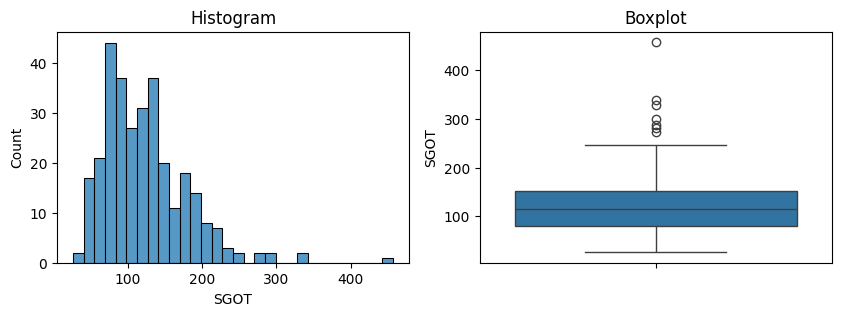

Skewness: 1.4474186250483927
Kurtosis: 4.289812936450611


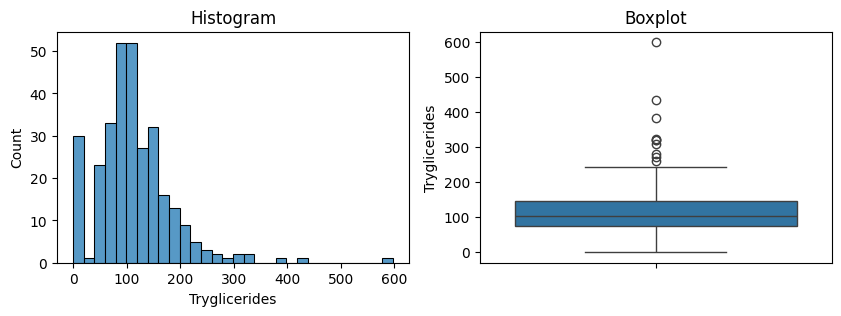

Skewness: 1.673768524651463
Kurtosis: 7.7356324734000665


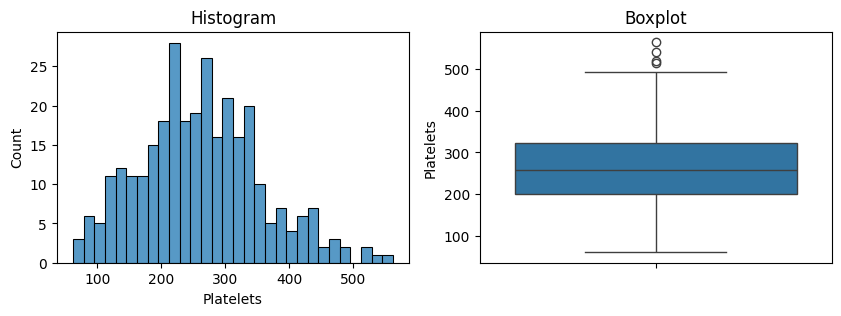

Skewness: 0.3734854844035126
Kurtosis: -0.005941626677032907


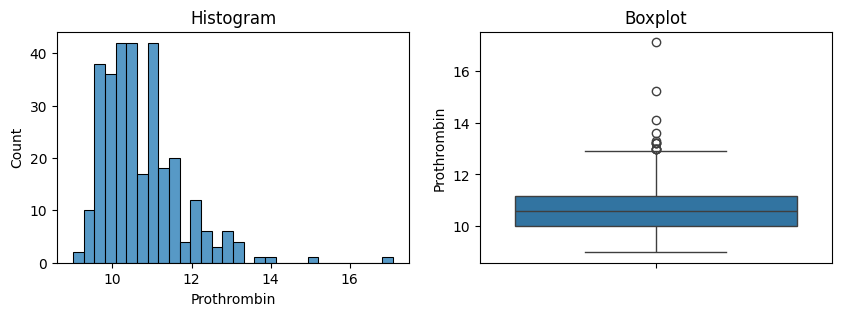

Skewness: 1.7392944630320002
Kurtosis: 6.018483343031384


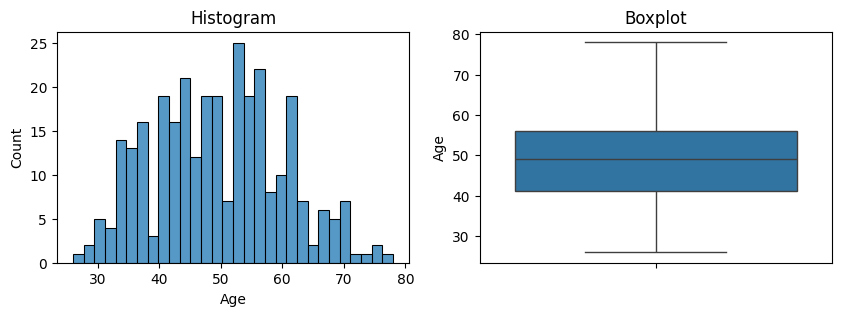

Skewness: 0.1744082615846146
Kurtosis: -0.5159317765592006


In [24]:
# Make a plot to check distribution
def check_distribution_outliers(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_outliers(df[numerical_columns], numerical_columns)

There are outliers in all numeric variables except Age. However, we won't drop or modify them because these outliers represent **valid data points** and could have **significant meaning** in identifying cirrhosis patterns. The outliers are **reasonable** and therefore don't require any adjustments. Additionally, since this is a medical report, the data should remain unchanged.

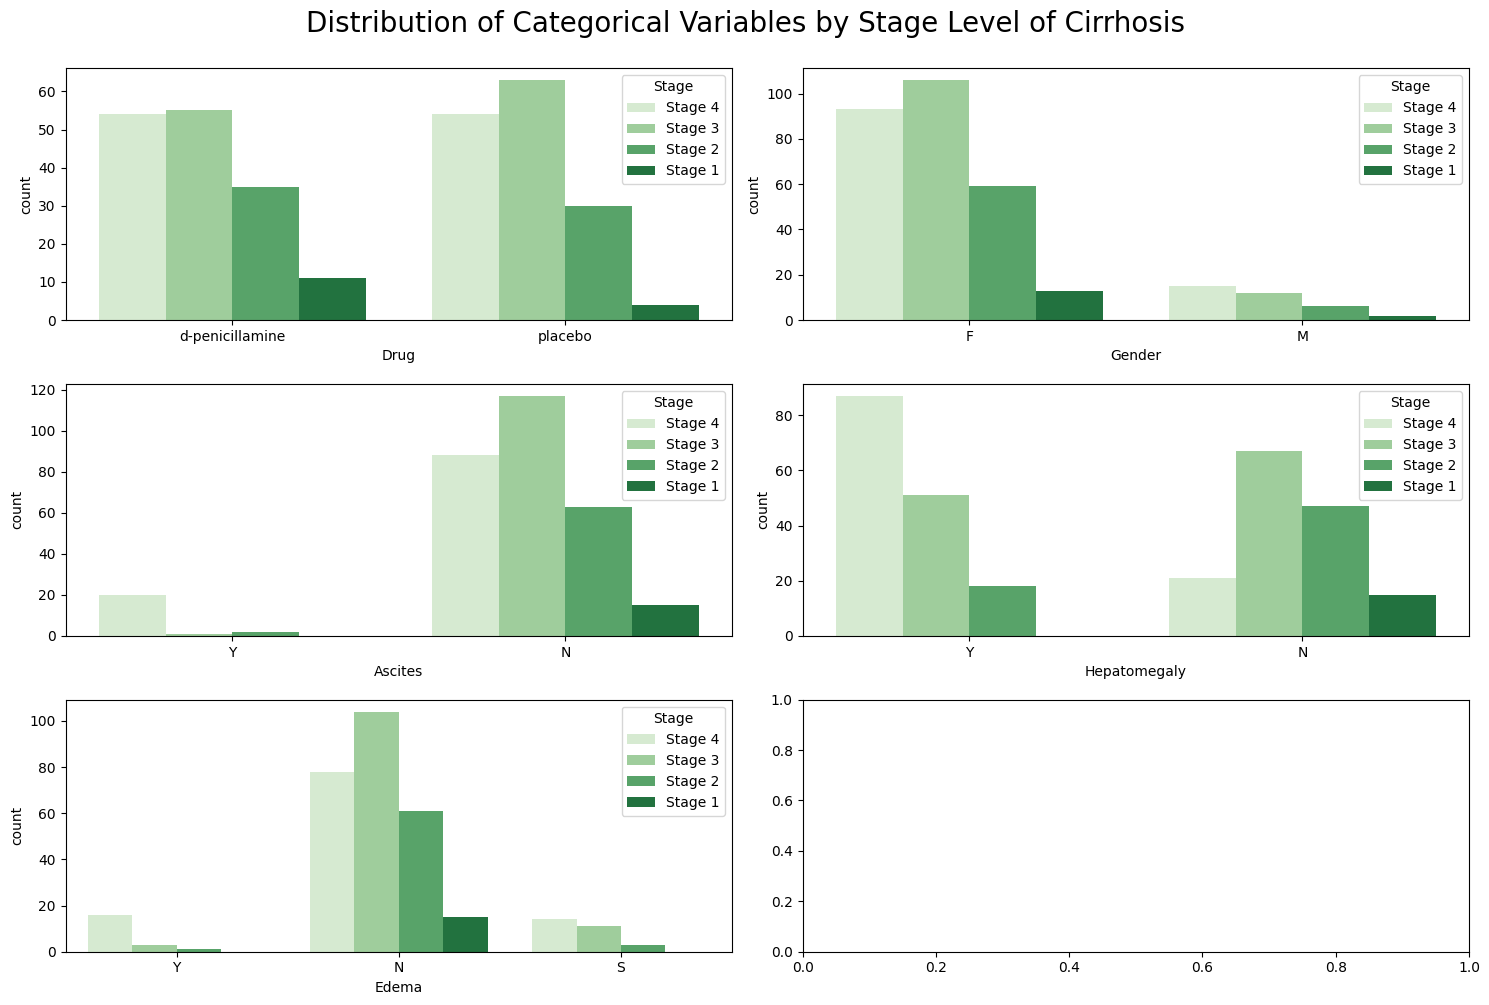

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Create Subplots
sns.countplot(x="Drug", hue="Stage", data=df, ax=ax[0][0], palette='Greens')
sns.countplot(x="Gender", hue="Stage", data=df, ax=ax[0][1], palette='Greens')
sns.countplot(x="Ascites", hue="Stage", data=df, ax=ax[1][0], palette='Greens')
sns.countplot(x="Hepatomegaly", hue="Stage", data=df, ax=ax[1][1], palette='Greens')
sns.countplot(x="Edema", hue="Stage", data=df, ax=ax[2][0], palette='Greens')

fig.suptitle('Distribution of Categorical Variables by Stage Level of Cirrhosis', fontsize=20, y=1)

plt.tight_layout()
plt.show()

**Distribution of Categorical Variables by Stage Level of Cirrhosis**

**Drug** : 
- For both drugs, the counts decrease as the cirrhosis stage progresses from 4 to 1.
- However, for placebo, there is a slight increase in Stage 3 compared to Stage 4, before decreasing again in Stages 2 and 1.
- Slightly more patients in Stage 4 and 3 received placebo compared to d-penicillamine.

**Gender** :
- Female patients (F) significantly outnumber male patients (M) across all stages of cirrhosis.
- Interestingly, for female patients, there is a small increase in Stage 3 compared to Stage 4, before the numbers drop in earlier stages.
- For male patients, the counts consistently decrease across the stages.

**Ascites** :
- Most patients across all stages did not exhibit ascites.
- For patients without ascites, there is a slight increase in Stage 3 compared to Stage 4, followed by a decrease in Stages 2 and 1.
- A small number of patients exhibited ascites, and their count decreases steadily as the stage progresses.

**Hepatomegaly** :
- In Stage 4, most patients exhibit hepatomegaly, while the number of patients without hepatomegaly is very low..
- In Stage 3, the number of patients without hepatomegaly increases significantly, before decreasing again in Stages 2 and 1.
- For patients with hepatomegaly, the counts steadily decline from Stage 4 through Stage 1, with no patients in Stage 1 experiencing hepatomegaly.

**Edema** :
- Patients without edema : The count is highest in Stage 3, followed by Stage 4, and then decreases in earlier stages.
- Patients with some edema : The count is highest in Stage 4, and it decreases steadily across Stages 3 and 2, and there are no patiens in Stage 1 with some edema.
- Patients with significant edema : The count is highest in Stage 4, decreases through Stages 3 and 2, and there are no patients in Stage 1 with significant edema.

C:\Users\Asus\AppData\Local\Temp\ipykernel_6448\531144716.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Stage", y="Bilirubin", data=df, ax=ax[0][0], palette='Greens')
C:\Users\Asus\AppData\Local\Temp\ipykernel_6448\531144716.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Stage", y="Albumin", data=df, ax=ax[0][1], palette='Greens')
C:\Users\Asus\AppData\Local\Temp\ipykernel_6448\531144716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Stage", y="Copper", data=df, ax=ax[0][2], palette='Greens')
C:\Users\Asus\AppData\Lo

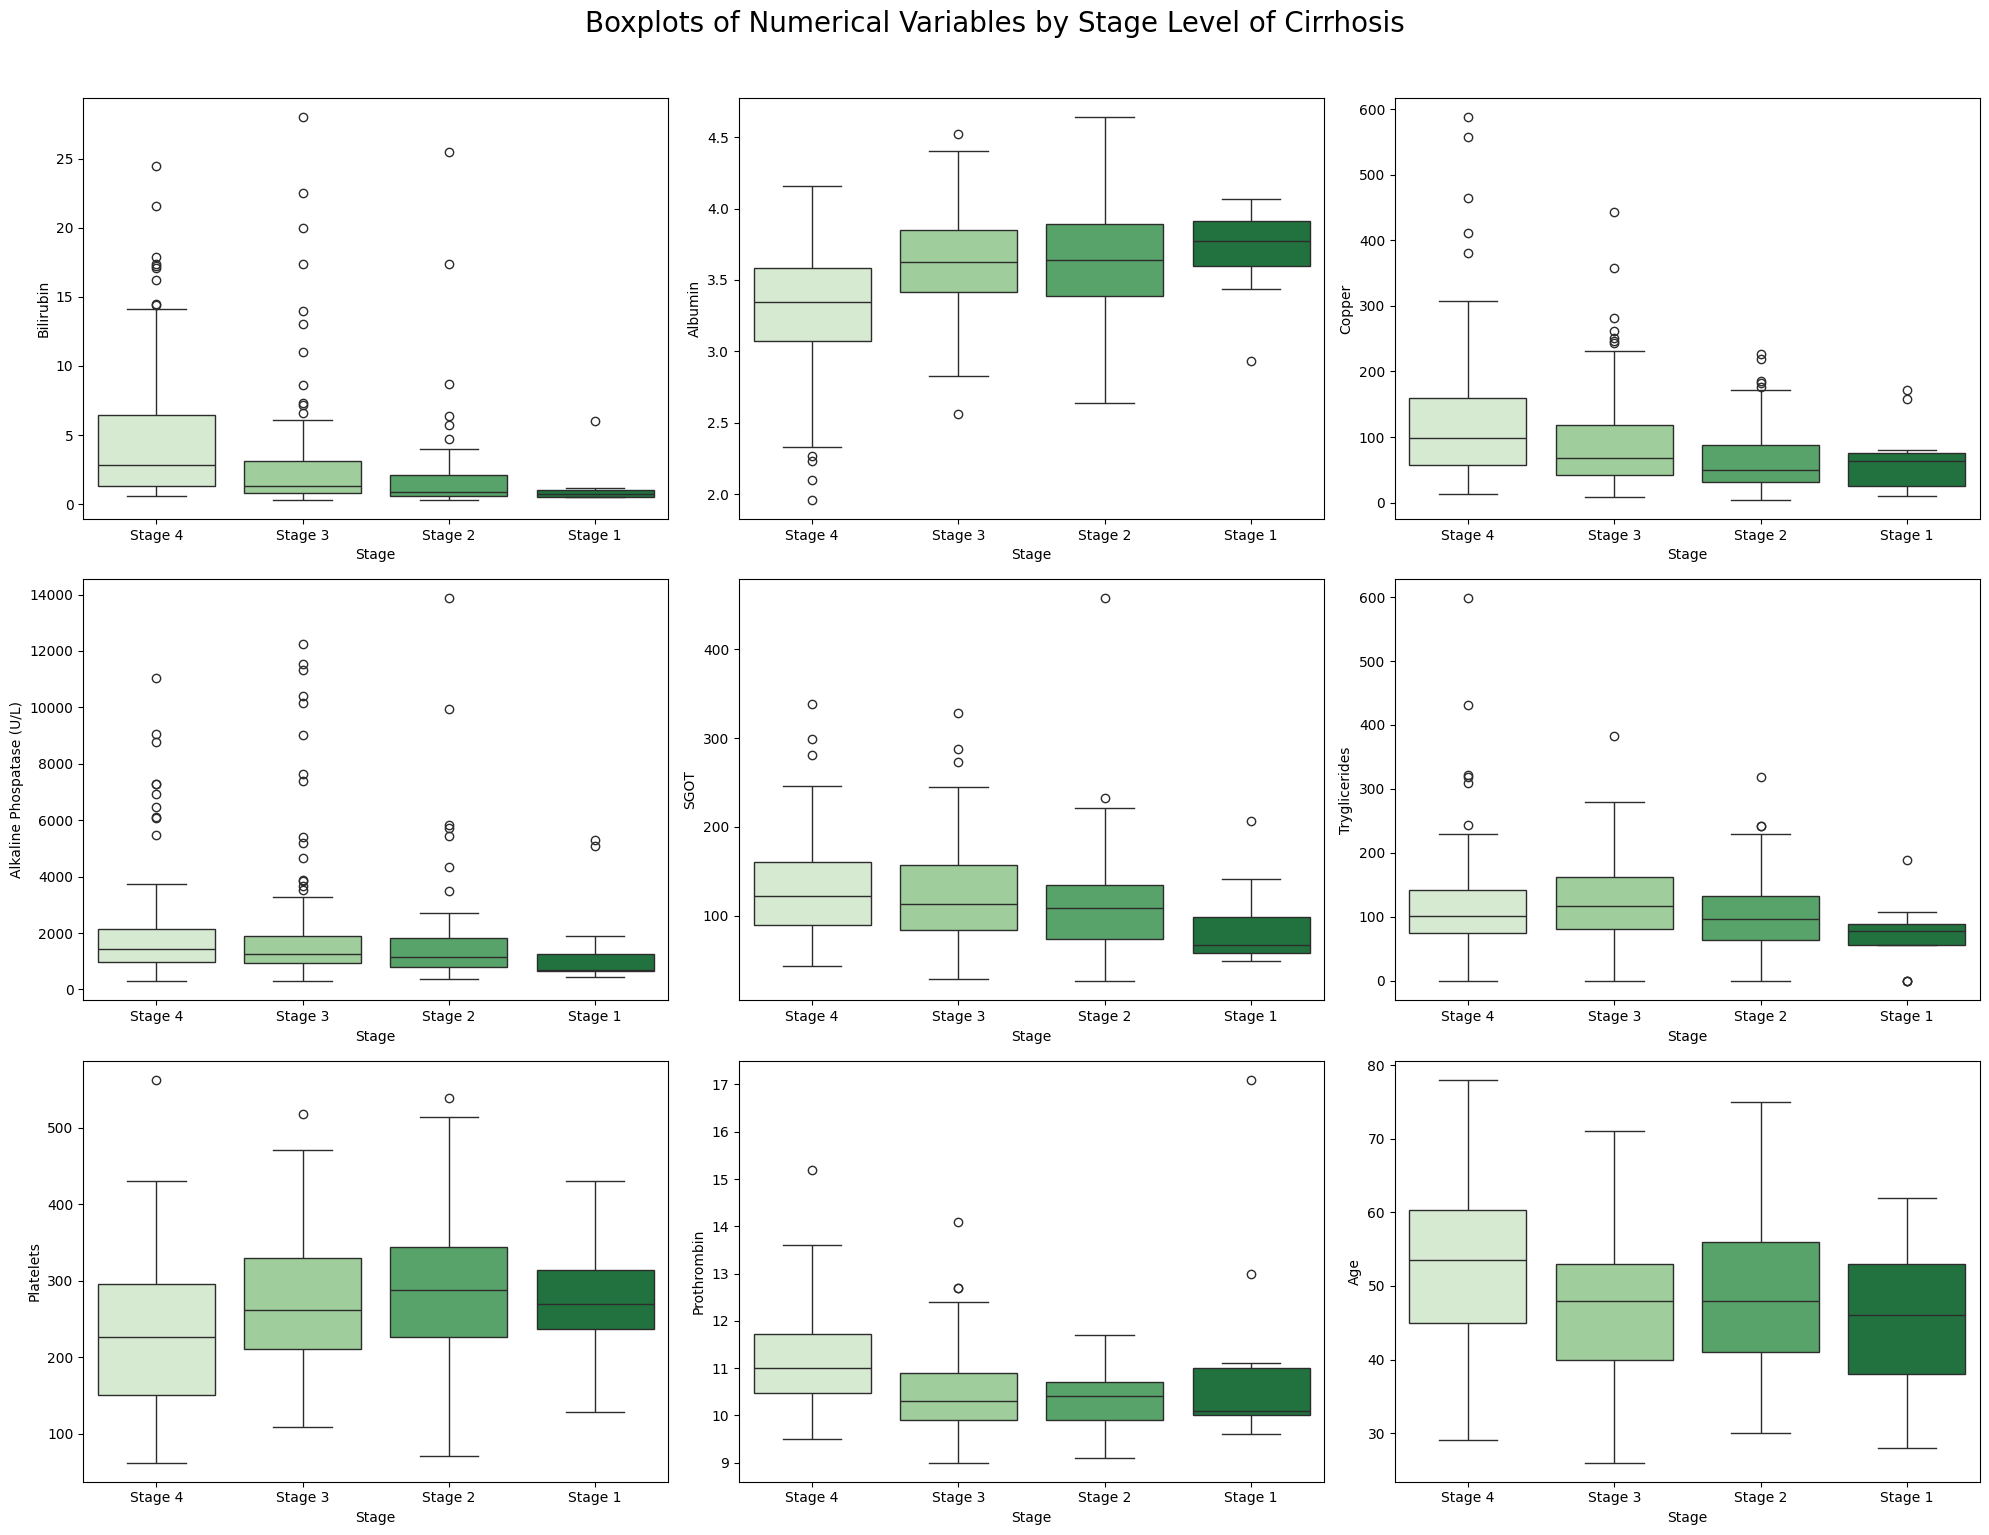

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 15)) 

# Create Boxplots for Numerical Variables
sns.boxplot(x="Stage", y="Bilirubin", data=df, ax=ax[0][0], palette='Greens')
sns.boxplot(x="Stage", y="Albumin", data=df, ax=ax[0][1], palette='Greens')
sns.boxplot(x="Stage", y="Copper", data=df, ax=ax[0][2], palette='Greens')
sns.boxplot(x="Stage", y="Alkaline Phospatase (U/L)", data=df, ax=ax[1][0], palette='Greens')
sns.boxplot(x="Stage", y="SGOT", data=df, ax=ax[1][1], palette='Greens')
sns.boxplot(x="Stage", y="Tryglicerides", data=df, ax=ax[1][2], palette='Greens')
sns.boxplot(x="Stage", y="Platelets", data=df, ax=ax[2][0], palette='Greens')
sns.boxplot(x="Stage", y="Prothrombin", data=df, ax=ax[2][1], palette='Greens')
sns.boxplot(x="Stage", y="Age", data=df, ax=ax[2][2], palette='Greens')

fig.suptitle('Boxplots of Numerical Variables by Stage Level of Cirrhosis', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()


**Boxplots of Numerical Variables by Stage Level of Cirrhosis** :

**Bilirubin** :
- Stage 4 has the highest median bilirubin levels and the largest spread, with a significant number of outliers.
- As the stage decreases (towards Stage 1), bilirubin levels drop, with Stage 1 showing the lowest median and almost no extreme outliers.

**Albumin** :
- Stage 4 has the lowest median albumin levels and the smallest spread.
- The median and spread of albumin levels increase steadily across stages, with Stage 1 showing the highest levels.

**Copper** :
- Copper levels are highest in Stage 4, with a wider spread and numerous outliers.
- As the stage decreases, the median copper levels reduce, with Stage 1 having the lowest median copper levels and a narrower spread.

**Alkaline Phosphatase (IU/L)** :
- Stage 4 shows the highest median alkaline phosphatase levels and the most significant spread, with many outliers.
- The levels gradually decrease across stages, with Stage 1 showing the lowest median and the smallest spread.

**SGOT** :
- Stage 4 has the highest median SGOT levels and a larger spread with some outliers.
- The levels drop consistently as the stages progress, with Stage 1 showing the lowest median SGOT levels and fewer outliers.

**Triglycerides** :
- Stage 3 shows the highest median triglycerides levels, with a broader spread compared to the other stages.
- In Stage 4, the triglyceride levels are slightly lower than in Stage 3.
- The median levels decrease progressively from Stage 3 to Stage 1, with Stage 1 having the lowest triglyceride levels.

**Platelets** :
- Stage 4 has the lowest median platelet levels and a relatively smaller spread compared to other stages. There are outliers visible above the whiskers.
- Stage 3 shows a slightly higher median than Stage 4 and continues increases in Stage 2, with a wider interquartile range (IQR).
- Stage 1 has the highest median platelet levels, with a wide spread but no visible outliers.

**Prothrombin** :
- Stage 4 shows the lowest median prothrombin levels, with a relatively small spread. A few outliers are present above the whiskers.
- Stage 3 show a slightly higher median than Stage 4, with a slightly larger spread.
- Stage 2 shows a higher median compared to Stage 3, with a similar IQR.
- Stage 1 has the highest median prothrombin levels, with a narrower spread and fewer outliers.

**Age** :
- Patients in Stage 4 have the highest median age, around 55-60 years.
- The median age drops noticeably compared to Stage 4, reaching around 50 years.
- The median age increases again compared to Stage 3, reaching about 53-55 years, almost matching Stage 4. The age distribution remains consistent, with a wide spread across the range.
- The median age drops significantly, becoming the lowest among all stages (around 45-50 years). The spread is slightly narrower, indicating less variation in age among Stage 1 patients.

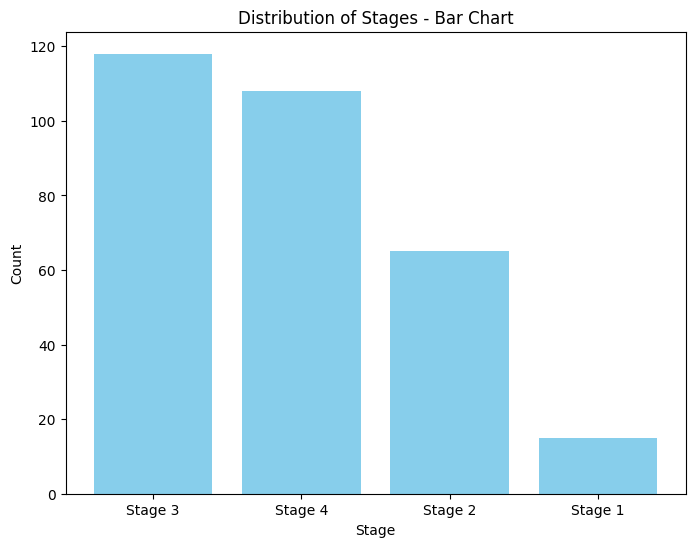

In [27]:
# Plot to see the distribution of each stage
plt.figure(figsize=(8, 6))
plt.bar(stage_counts.index, stage_counts.values, color='skyblue')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.title('Distribution of Stages - Bar Chart')
plt.show()

**Cirrhosis Distribution** :
- **Stage 3** : Has the highest number of cases, indicating that cirrhosis is most prevalent at this stage.
- **Stage 4** : The number of cases decreases compared to Stage 3, but it’s still relatively high.
- **Stage 2** : Cases decline further, showing a significant drop compared to Stage 3 and 4.
- **Stage 1** : Has the fewest cases, making it the least common stage for cirrhosis.

**Summary** : The prevalence of cirrhosis is highest in Stage 3 and then progressively decreases through Stage 4, Stage 2, and finally Stage 1. This suggests that most patients are diagnosed or monitored in Stage 3, with fewer cases observed at the extremes (early or very advanced stages).

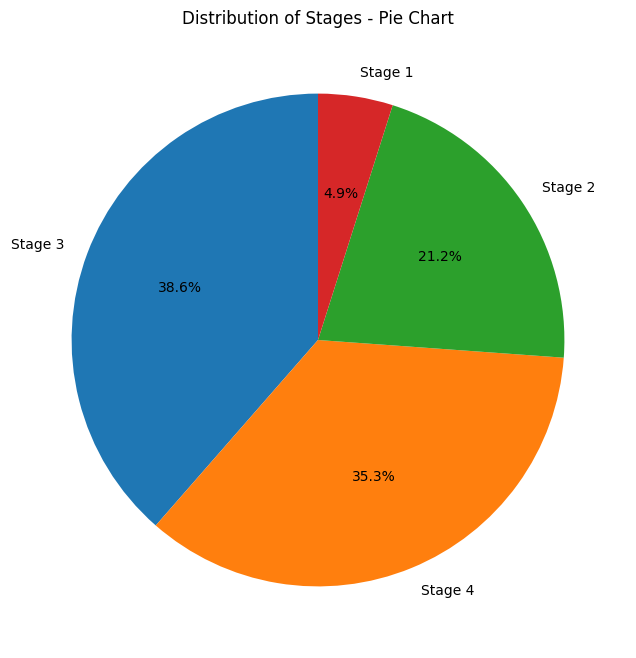

In [28]:
# Plot to see the comparison about each stage level
plt.figure(figsize=(8, 8))
plt.pie(stage_counts.values, labels=stage_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Stages - Pie Chart')
plt.show()

**Cirrhosis Distribution - Pie Chart** :
- **Stage 3 (38.6%)** : The largest proportion of cases falls in Stage 3, making it the most common stage for cirrhosis.
- **Stage 4 (35.3%)** : The second-highest proportion is in Stage 4, suggesting a substantial number of cases progress to advanced cirrhosis.
- **Stage 2 (21.2%)** : Represents a moderate percentage of cases. It is significantly lower than Stage 3 and Stage 4 but still noteworthy.
- **Stage 1 (4.9%)** : The smallest proportion of cases is in Stage 1, indicating that cirrhosis is rarely detected or reported at the earliest stage.

# Feature Engineering

In [29]:
# Display the Data
df.head()

,Drug,Gender,Ascites,Hepatomegaly,Edema,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age
0,d-penicillamine,F,Y,Y,Y,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,Stage 4,58
1,d-penicillamine,F,N,Y,N,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,Stage 3,56
2,d-penicillamine,M,N,N,S,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,Stage 4,70
3,d-penicillamine,F,N,Y,S,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,Stage 4,54
4,placebo,F,N,Y,N,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,Stage 3,38


In [30]:
ohe_enc = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
bin_enc = LabelEncoder()

Encode all the **categorical columns** because the model can only learn from numerical values.

In [31]:
# Fit transform columns with label encoder
df['Drug'] = bin_enc.fit_transform(df[['Drug']])
df['Gender'] = bin_enc.fit_transform(df[['Gender']])
df['Ascites'] = bin_enc.fit_transform(df[['Ascites']])
df['Hepatomegaly'] = bin_enc.fit_transform(df[['Hepatomegaly']])
df['Stage'] = bin_enc.fit_transform(df[['Stage']])

c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\preprocessing\_label.py:114: D

- For **Drug, Gender, Ascites, and Hepatomegaly** columns,  use label encoding because these columns contain only two distinct values.
- For **Stage** column, use label encoding because it has ordered or hierarchical values.

In [32]:
# Apply one-hot encoding to the categorical columns
one_hot_encoded = ohe_enc.fit_transform(df[['Edema']])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe_enc.get_feature_names_out(['Edema']))

# Concatenate the one-hot encoded dataframe with the original dataframe
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df = df.drop(['Edema'], axis=1)

Use one-hot encoding for the **Edema** column because this column is independent and does not have any order or hierarchy.

In [33]:
# Display the data
df.head()

,Drug,Gender,Ascites,Hepatomegaly,Bilirubin,Albumin,Copper,Alkaline Phospatase (U/L),SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Age,Edema_N,Edema_S,Edema_Y
0,0,0,1,1,14.5,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3,58,0.0,0.0,1.0
1,0,0,0,1,1.1,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2,56,1.0,0.0,0.0
2,0,1,0,0,1.4,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3,70,0.0,1.0,0.0
3,0,0,0,1,1.8,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3,54,0.0,1.0,0.0
4,1,0,0,1,3.4,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2,38,1.0,0.0,0.0


# Data Splitting

## Train Data

In [34]:
#Train Test Split
# Drop the stage column for the variable x
x = df[df.columns.drop(['Stage'])]
# Fill the y variable with stage
y = df['Stage']

# Split the data to 80% train data and 20% test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=123)
print(x_train.shape,x_test.shape)

(244, 16) (62, 16)


X represents the **independent variables**, and y is the **target** of the model. In this dataset, we use **Stage** as y because it is the target, and the remaining columns are used as x. Afterward, split the data into **80% for training** and **20% for testing**.

## Oversampling

In [35]:
# Apply SMOTE for oversampling the training data
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [36]:
# Display the class distribution after oversampling
print("Before Oversampling:")
print(y_train.value_counts())

print("\nAfter Oversampling:")
print(pd.Series(y_resampled).value_counts())

Before Oversampling:
Stage
2    101
3     81
1     50
0     12
Name: count, dtype: int64

After Oversampling:
Stage
1    101
3    101
2    101
0    101
Name: count, dtype: int64


Our target **Stage** column has imbalanced data, so we need to apply either undersampling or oversampling to balance it. We choose oversampling because the dataset only contains 418 entries, making oversampling the best choice for this case.

## Shapiro

In [37]:
# Calculate shapiro
for i in numerical_columns:
  print(i,":\n", shapiro(df[i]), "\n")

Bilirubin :
 ShapiroResult(statistic=0.626072883605957, pvalue=2.651746072139116e-25) 

Albumin :
 ShapiroResult(statistic=0.9797792434692383, pvalue=0.0002575731778051704) 

Copper :
 ShapiroResult(statistic=0.790023922920227, pvalue=1.4634368244893354e-19) 

Alkaline Phospatase (U/L) :
 ShapiroResult(statistic=0.6123024225234985, pvalue=1.0898550976911643e-25) 

SGOT :
 ShapiroResult(statistic=0.9120213985443115, pvalue=2.141211036602031e-12) 

Tryglicerides :
 ShapiroResult(statistic=0.8889103531837463, pvalue=3.843880576792809e-14) 

Platelets :
 ShapiroResult(statistic=0.9880037307739258, pvalue=0.012351727113127708) 

Prothrombin :
 ShapiroResult(statistic=0.8831713199615479, pvalue=1.5519903477602057e-14) 

Age :
 ShapiroResult(statistic=0.9891015887260437, pvalue=0.021665753796696663) 



All numeric columns have a p-value < 0.05, meaning they **do not follow a normal distribution**. Therefore, we use a robust scaler for scaling, as it is suitable for variables that do not follow a normal distribution.

## Scaling

In [38]:
# Initialize Scalers
rob_scaler = RobustScaler()

# Scale the x train and x test
x_resampled = rob_scaler.fit_transform(x_resampled)
x_test = rob_scaler.transform(x_test)

# Modelling

## Random Forest Model

In [39]:
RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4, class_weight='balanced')
RF_class.fit(x_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', max_depth=4)

In [40]:
# Make predictions
y_pred = RF_class.predict(x_test)
y_pred_prob = RF_class.predict_proba(x_test)[:, 1]

### Evaluate Random Forest Model

In [41]:
# Classification Report
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred))

Classification Report Random Forest:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.36      0.33      0.34        15
           2       0.33      0.35      0.34        17
           3       0.70      0.70      0.70        27

    accuracy                           0.48        62
   macro avg       0.35      0.35      0.35        62
weighted avg       0.48      0.48      0.48        62



**Detail Classification Report :**

**Accuracy :** 48%, this indicates that the model **correctly predicts** 48% of the samples overall.

**F1-Score Macro :** 35%, reflects the average F1-score across all classes, indicating moderate performance.

**Weighted Average F1-Score** : 48%, takes into account the class distribution, matching the accuracy.

**Class 0 :**
- **Precision :** 0, it means that the model **does not classify** any samples correctly as class 0.
- **Recall :** 0, it means that **none** of the true class 0 samples are **correctly identified**.
- **F1-Score :** 0, it means that **no balance** between precision and recall for this class..

**Conclusion :** The model **completely fails** to identify or classify samples of class 0.

**Class 1 :**
- **Precision :** 0.36, it means that class **1** 36% **correctly classified** from all samples predicted as **1**.
- **Recall :** 0.33, it means that class **1** 33% **correctly predicted** from all **true 1** samples.
- **F1-Score :** 0.34, it means that the balance between precision and recall is **relatively low**.

**Conclusion :** The model **struggles** to accurately **detect and classify** class 1, with low performance across all metrics.

**Class 2 :**
- **Precision :** 0.33, it means that class **2** 33% **correctly classified** from all samples predicted as **2**.
- **Recall :** 0.35, it means that class **2** 35% **correctly predicted** from all **true 2** samples.
- **F1-Score :** 0.34, it means that the balance between precision and recall is **relatively low**.

**Conclusion :** The model's performance for class 2 is **comparable** to class 1, with low precision and recall.

**Class 3 :**
- **Precision :** 0.70, it means that class **3** 70% **correctly classified** from all samples predicted as **C**.
- **Recall :** 0.70, it means that class **3** 70% **correctly predicted** from all **true 3** samples.
- **F1-Score :** 0.70, it means that the balance between precision and recall is **the highest** compare with other classes.

**Conclusion :** The model **performs the best** with class 3 compare with other classess, showing high reliability for this category.

**Summary of Performance** :
- The model **fails completely** for class 0 (Stage 1).
- It **struggles** with class 1 (Stage 2) and class 2 (Stage 3), showing low precision, recall, and F1-scores.
- The **best performance** is observed for class 3 (Stage 4), where the metrics indicate a strong predictive capability.
- The overall accuracy and F1-scores highlight the **need for improvement**, especially in detecting minority classes like class 0.

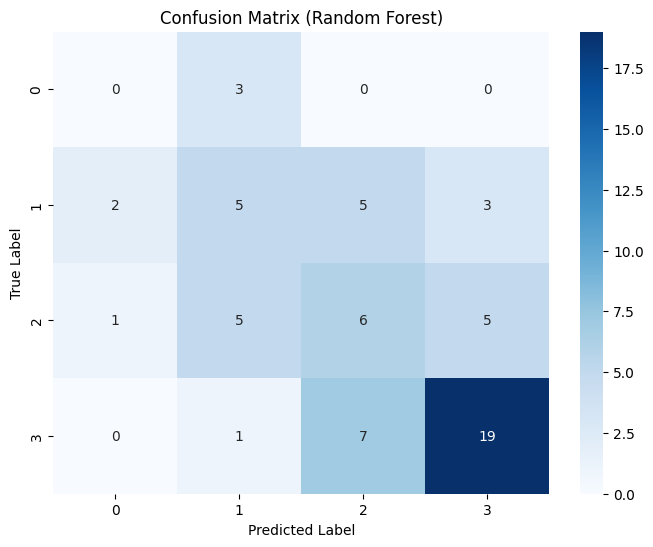

In [42]:
# Confusion Matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

**Detail Confusion Matrix :**

**Class 0 :**
- **True Positive :** 0, it means that no samples were **correctly predicted** as class 0.
- **False Positive :** 3, it means that 3 samples were **true 0** but **mispredicted**.

**Class 1 :**
- **True Positive :** 5, it means that 5 samples were **correctly predicted** as class 1.
- **False Positive :** 10, it means that 10 samples were **true 1** but **mispredicted**.

**Class 2 :**
- **True Positive :** 6, it means that 6 samples were **correctly predicted** as class 2.
- **False Positive :** 11, it means that 11 samples were **true 2** but **mispredicted**.

**Class 3 :**
- **True Positive :** 19, it means that 19 samples were **correctly predicted** as class 3.
- **False Positive :** 8, it means that 8 samples were **true 3** but **misclassified**.

### Fine-Tuning Random Forest Model

In [43]:
# Make parameters for fine-tuning
parameters = {
    'n_estimators': [50,100,200],  # Number of trees
    'max_depth': [3,5,10],  # Maximum depth of trees
    'criterion': ['gini', 'entropy','log_loss'],  # Criteria for splitting
}

In [44]:
# Perform the grid search
RF_class2 = RandomForestClassifier(random_state=42, class_weight='balanced')
RF_class2= GridSearchCV(RF_class2,
                        param_grid = parameters,   # hyperparameters
                        scoring='f1_macro',        # metric for scoring
                        cv=5,                      # 5 / 10
                        n_jobs=-1,
                        verbose=2)
RF_class2.fit(x_resampled,y_resampled)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1_macro', verbose=2)

In [45]:
# Print the best parameters for this model
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Best F1-Score:", RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}
Best F1-Score: 0.7135015638120741


In [46]:
# Train the best model on the full training data
best_RF_model = RF_class2.best_estimator_
best_RF_model.fit(x_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=200, random_state=42)

In [47]:
# Make predictions
y_pred = best_RF_model.predict(x_test)
y_pred_prob = best_RF_model.predict_proba(x_test)[:, 1]

### Evaluate Random Forest Model After Fine-Tuning

In [48]:
# Print the classification report
print('\nClassification Random Forest (Tuned):\n')
print(classification_report(y_test, y_pred))


Classification Random Forest (Tuned):

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.42      0.33      0.37        15
           2       0.29      0.35      0.32        17
           3       0.72      0.78      0.75        27

    accuracy                           0.52        62
   macro avg       0.36      0.37      0.36        62
weighted avg       0.49      0.52      0.50        62



c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

**Detail Classification Report :**

**Accuracy :** 52%, this indicates a **slight improvement** compared to the original model

**F1-Score Macro :** 36%, reflects a **marginal improvement** in the average F1-score across all classes.

**Weighted Average F1-Score** : 50%, this is **slightly higher** than before, showing some improvements in accounting for class distribution.

**Class 0 :**
- **Precision :** 0, it means that the model **does not classify** any samples correctly as class 0.
- **Recall :** 0, it means that **none** of the true class 0 samples are **correctly identified**.
- **F1-Score :** 0, it means that **no balance** between precision and recall for this class..

**Conclusion :** The model **still fails** to identify or classify samples of class 0 effectively.

**Class 1 :**
- **Precision :** 0.42, it means that class **1** 42% **correctly classified** from all samples predicted as **1**.
- **Recall :** 0.33, it means that class **1** 33% **correctly predicted** from all **true 1** samples.
- **F1-Score :** 0.37, it means that the model **improved** balance between precision and recall compared to the previous model.

**Conclusion :** The model performs **slightly better** for class 1 after fine-tuning

**Class 2 :**
- **Precision :** 0.29, it means that class **2** 29% **correctly classified** from all samples predicted as **2**.
- **Recall :** 0.35, it means that class **2** 35% **correctly predicted** from all **true 2** samples.
- **F1-Score :** 0.32, it means that the balance between precision and recall is **relatively low**.

**Conclusion :** The model's performance for class 2 shows **minor regression** in precision and F1-score, requiring further optimization.

**Class 3 :**
- **Precision :** 0.72, it means that class **3** 72% **correctly classified** from all samples predicted as **C**.
- **Recall :** 0.78, it means that class **3** 78% **correctly predicted** from all **true 3** samples.
- **F1-Score :** 0.75, demonstrates a **stronger balance** between precision and recall compared to the original model.

**Conclusion :** The model shows **significant improvement** in class 3, with the highest performance metrics among all classes.

**Summary of Performance** :
- **Class 0 (Stage 1)** remains a persistent challenge, with no improvement after fine-tuning.
- **Class 1 (Stage 2)** sees a modest gain in F1-score, indicating some improvement in balance.
- **Class 2 (Stage 3)** shows a slight regression in overall performance.
- **Class 3 (Stage 4)** exhibits the most significant improvement, with a marked increase in precision, recall, and F1-score.

**Analyze** :
- Fine-tuning improved the **accuracy and weighted average F1-score**, suggesting better performance on dominant classes.
- The improvement in **F1-score macro** is limited, highlighting the model’s persistent challenges with minority classes. To further boost macro F1-score and handle class imbalance, I applied oversampling using SMOTE. However, after oversampling, the results are **still poor**, indicating that the model is **not performing well** in predicting the minority classes. The goal of oversampling was to increase the model’s ability to predict the minority classes, but it has had no noticeable effect.

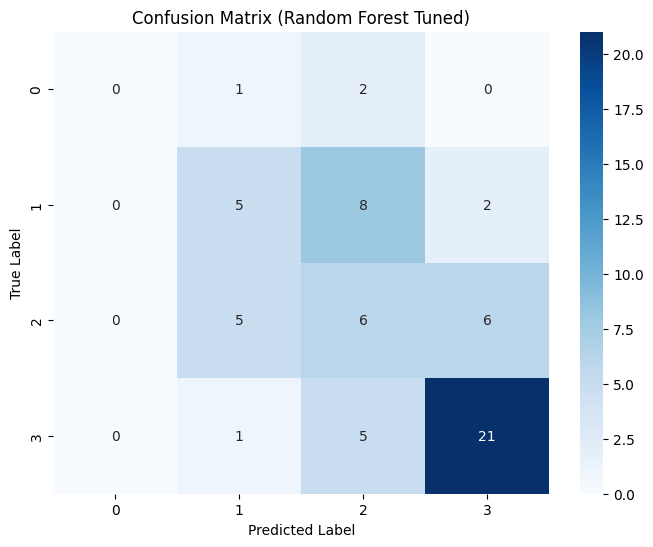

In [49]:
# Confusion Matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Random Forest Tuned)")
plt.show()

**Detail Confusion Matrix :**

**Class 0 :**
- **True Positive :** 0, it means that no samples were **correctly predicted** as class 0.
- **False Positive :** 3, it means that 3 samples were **true 0** but **mispredicted**.

**Class 1 :**
- **True Positive :** 5, it means that 5 samples were **correctly predicted** as class 1.
- **False Positive :** 10, it means that 10 samples were **true 1** but **mispredicted**.

**Class 2 :**
- **True Positive :** 6, it means that 6 samples were **correctly predicted** as class 2.
- **False Positive :** 11, it means that 11 samples were **true 2** but **mispredicted**.

**Class 3 :**
- **True Positive :** 21, it means that 21 samples were **correctly predicted** as class 3.
- **False Positive :** 6, it means that 6 samples were **true 3** but **misclassified**.

## XGBoost Model

In [50]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,        # Learning rate
    subsample=0.8,             # Subsampling ratio of training instances
    colsample_bytree=0.8,      # Subsampling ratio of columns when constructing trees
    max_depth=6,               # Maximum depth of a tree
    random_state=42,           # Random seed for reproducibility
)

In [51]:
# Train the XGBoost model
xgb_model.fit(x_resampled, y_resampled)

# Make predictions
y_pred = xgb_model.predict(x_test)
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

### Evaluate XGBoost Model

In [52]:
# Classification Report
print("Classification Report XGBoost Model:\n", classification_report(y_test, y_pred))

Classification Report XGBoost Model:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.33      0.27      0.30        15
           2       0.17      0.24      0.20        17
           3       0.65      0.63      0.64        27

    accuracy                           0.40        62
   macro avg       0.29      0.28      0.28        62
weighted avg       0.41      0.40      0.41        62



**Detail Classification Report :**

**Accuracy :** 40%, this indicates that the model **correctly predicts** 48% of the samples overall.

**F1-Score Macro :** 28%, reflects the average F1-score across all classes, indicating moderate performance.

**Weighted Average F1-Score** : 41%, takes into account the class distribution, matching the accuracy.

**Class 0 :**
- **Precision :** 0, it means that the model **does not classify** any samples correctly as class 0.
- **Recall :** 0, it means that **none** of the true class 0 samples are **correctly identified**.
- **F1-Score :** 0, it means that **no balance** between precision and recall for this class..

**Conclusion :** The model **completely fails** to identify or classify samples of class 0.

**Class 1 :**
- **Precision :** 0.33, it means that class **1** 33% **correctly classified** from all samples predicted as **1**.
- **Recall :** 0.27, it means that class **1** 27% **correctly predicted** from all **true 1** samples.
- **F1-Score :** 0.30, it means that the balance between precision and recall is **relatively low**.

**Conclusion :** The model **struggles** to accurately **detect and classify** class 1, with low performance across all metrics.

**Class 2 :**
- **Precision :** 0.17, it means that class **2** 17% **correctly classified** from all samples predicted as **2**.
- **Recall :** 0.24, it means that class **2** 24% **correctly predicted** from all **true 2** samples.
- **F1-Score :** 0.20, it means that the balance between precision and recall is **relatively low**.

**Conclusion :** The model's performance for class 2 is **lower** than class 1, with low performance across all metrics.

**Class 3 :**
- **Precision :** 0.65, it means that class **3** 65% **correctly classified** from all samples predicted as **C**.
- **Recall :** 0.63, it means that class **3** 63% **correctly predicted** from all **true 3** samples.
- **F1-Score :** 0.64, it means that the balance between precision and recall is **the highest** compare with other classes.

**Conclusion :** The model **performs the best** with class 3 compare with other classess, showing high reliability for this category.

**Summary of Performance** :
- The model **fails completely** for class 0 (Stage 1).
- It **struggles** with class 1 (Stage 2) and class 2 (Stage 3), showing low precision, recall, and F1-scores.
- The **best performance** is observed for class 3 (Stage 4), where the metrics indicate a strong predictive capability.
- The overall accuracy and F1-scores highlight the **need for improvement**, especially in detecting minority classes like class 0 and class 2.

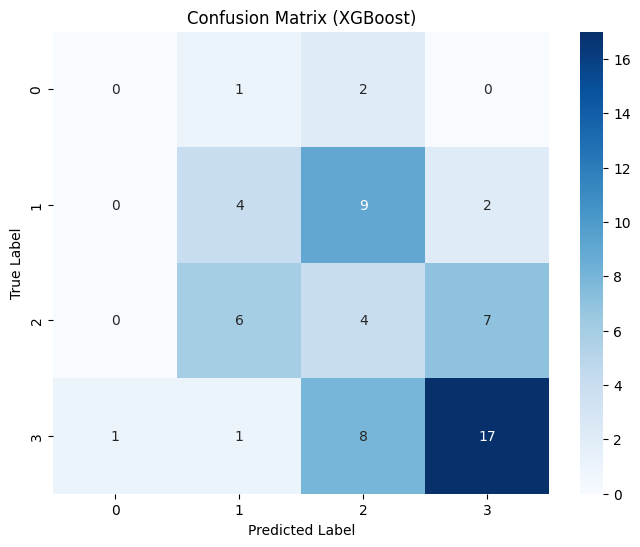

In [53]:
# Confusion Matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGBoost)")
plt.show()

**Detail Confusion Matrix :**

**Class 0 :**
- **True Positive :** 0, it means that no samples were **correctly predicted** as class 0.
- **False Positive :** 3, it means that 3 samples were **true 0** but **mispredicted**.

**Class 1 :**
- **True Positive :** 4, it means that 4 samples were **correctly predicted** as class 1.
- **False Positive :** 11, it means that 11 samples were **true 1** but **mispredicted**.

**Class 2 :**
- **True Positive :** 4, it means that 4 samples were **correctly predicted** as class 2.
- **False Positive :** 13, it means that 13 samples were **true 2** but **mispredicted**.

**Class 3 :**
- **True Positive :** 17, it means that 17 samples were **correctly predicted** as class 3.
- **False Positive :** 10, it means that 10 samples were **true 3** but **misclassified**.

### Fine-Tuning XGBoost Model

In [54]:
# Define the parameter grid for fine-tuning
param_grid = {
    'n_estimators': [50, 100, 150],       # Number of trees
    'max_depth': [3, 5, 7, 10],           # Maximum depth of a tree
    'learning_rate': [0.05, 0.1],         # Learning rate
    'subsample': [0.6, 0.8, 1.0],         # Subsampling ratio of training instances
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsampling ratio of columns when constructing trees
    'gamma': [0, 1]                       # Minimum loss reduction to make a split
}

In [55]:
# Set up RandomizedSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1_macro',  # Use F1 macro for multiclass evaluation
    cv=3,                # 3-fold cross-validation
    verbose=1,           # Verbosity
    n_jobs=-1            # Use all available CPU cores
)

In [56]:
grid_search.fit(x_resampled, y_resampled)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.6}
Best F1-Score: 0.7318554213051032


In [57]:
# Train the best model on the full training data
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(x_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### Evaluate XGBoost Model After Fine-Tuning

In [58]:
# Evaluate the model
y_pred = best_xgb_model.predict(x_test)
y_pred_prob = best_xgb_model.predict_proba(x_test)[:, 1]

In [59]:
# Classification Report
print("Classification Report (Tuned XGBoost):\n", classification_report(y_test, y_pred))

Classification Report (Tuned XGBoost):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.36      0.27      0.31        15
           2       0.19      0.24      0.21        17
           3       0.69      0.74      0.71        27

    accuracy                           0.45        62
   macro avg       0.31      0.31      0.31        62
weighted avg       0.44      0.45      0.44        62



**Detail Classification Report :**

**Accuracy :** 45%, the model's accuracy has **increased slightly** from 40% to 45%. 

**F1-Score Macro :** 31%, reflects a **marginal improvement** in the average F1-score across all classes.

**Weighted Average F1-Score** : 44%, this is **slightly higher** than before, showing some improvements in accounting for class distribution.

**Class 0 :**
- **Precision :** 0, it means that the model **does not classify** any samples correctly as class 0.
- **Recall :** 0, it means that **none** of the true class 0 samples are **correctly identified**.
- **F1-Score :** 0, it means that **no balance** between precision and recall for this class..

**Conclusion :** The model **still fails** to identify or classify samples of class 0 effectively.

**Class 1 :**
- **Precision :** 0.36, it means that class **1** 36% **correctly classified** from all samples predicted as **1**.
- **Recall :** 0.27, it means that class **1** 27% **correctly predicted** from all **true 1** samples.
- **F1-Score :** 0.31, it means that the model **improved** balance between precision and recall compared to the previous model.

**Conclusion :** The model performs **slightly better** for class 1 after fine-tuning

**Class 2 :**
- **Precision :** 0.19, it means that class **2** 19% **correctly classified** from all samples predicted as **2**.
- **Recall :** 0.24, it means that class **2** 24% **correctly predicted** from all **true 2** samples.
- **F1-Score :** 0.21, it means that the balance between precision and recall is **relatively low**.

**Conclusion :** The model's performance for class 2 shows **minor improvements** after fine-tuning, while recall remains unchanged.

**Class 3 :**
- **Precision :** 0.69, it means that class **3** 69% **correctly classified** from all samples predicted as **C**.
- **Recall :** 0.74, it means that class **3** 74% **correctly predicted** from all **true 3** samples.
- **F1-Score :** 0.71, demonstrates a **stronger balance** between precision and recall compared to the original model.

**Conclusion :** The model shows **significant improvement** in class 3, with the highest performance metrics among all classes.

**Summary of Performance** :
- **Class 0 (Stage 1)** remains a persistent challenge, with no improvement after fine-tuning.
- **Class 1 (Stage 2)** shows a slight improvement in precision and F1-score, but recall decreases marginally, indicating some trade-offs in performance.
- **Class 2 (Stage 3)** experiences minor gains in precision and F1-score, with recall remaining unchanged, reflecting limited improvement in balance.
- **Class 3 (Stage 4)** exhibits the most significant improvement, with a marked increase in precision, recall, and F1-score.

**Analyze** :
- Fine-tuning improved the **accuracy and weighted average F1-score**, suggesting better performance on dominant classes.
- The improvement in **F1-score macro** is limited, highlighting the model’s persistent challenges with minority classes. To further boost macro F1-score and handle class imbalance, I applied oversampling using SMOTE. However, after oversampling, the results are **still poor**, indicating that the model is **not performing well** in predicting the minority classes. The goal of oversampling was to increase the model’s ability to predict the minority classes, but it has had no noticeable effect.

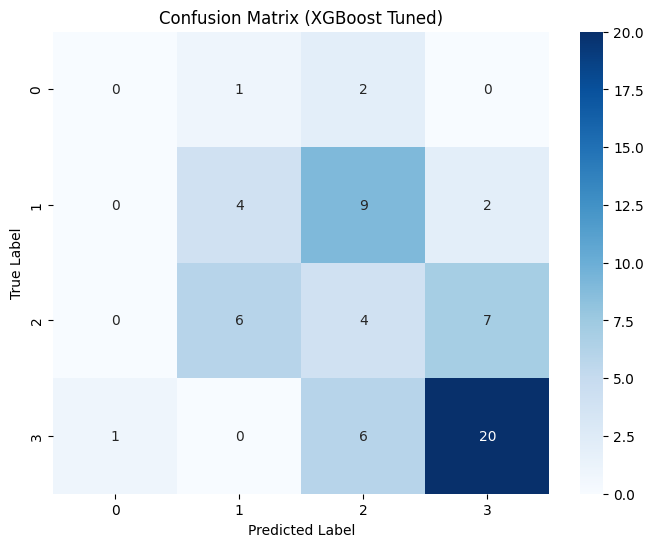

In [60]:
# Confusion Matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGBoost Tuned)")
plt.show()

**Detail Confusion Matrix :**

**Class 0 :**
- **True Positive :** 0, it means that no samples were **correctly predicted** as class 0.
- **False Positive :** 3, it means that 3 samples were **true 0** but **mispredicted**.

**Class 1 :**
- **True Positive :** 4, it means that 4 samples were **correctly predicted** as class 1.
- **False Positive :** 11, it means that 11 samples were **true 1** but **mispredicted**.

**Class 2 :**
- **True Positive :** 4, it means that 4 samples were **correctly predicted** as class 2.
- **False Positive :** 13, it means that 13 samples were **true 2** but **mispredicted**.

**Class 3 :**
- **True Positive :** 20, it means that 20 samples were **correctly predicted** as class 3.
- **False Positive :** 7, it means that 7 samples were **true 3** but **misclassified**.

modelnya bagusan random forest karna kalo dibandingin, terutama accuracy sama f1 macro tinggian random forest.

## Choosing Best Model

Based on the classification reports and confusion matrices for both the Random Forest and XGBoost models, **Random Forest** appears to be the better model overall.
1. **Accuracy** : Random Forest (52%) has a higher accuracy than XGBoost (45%), indicating it performs better overall in terms of the number of correct classifications.

2. **F1-Score Macro** : Random Forest (36%) has a higher F1-score macro than XGBoost (31%), which suggests it has a slightly better average performance across all classes, especially considering the model's balance between precision and recall.

3. **Weighted Average F1-Score** : Random Forest (50%) again shows a higher weighted F1-score than XGBoost (44%), meaning it accounts for class distribution better and performs better on dominant classes.

4. **Precision and Recall for Individual Classes** :
- **Class 0** : This class is a persistent challenge for both models.
- **Class 1** : Random Forest shows better performance in precision and recall for class 1.
- **Class 2** : Random Forest performs better in terms of precision, recall, and F1-score, indicating that it handles class 2 slightly better.
- **Class 3** : Random Forest performs better in terms of precision, recall, and F1-score for class 3, showing significant improvement and stronger overall performance in this class.

5. **Confusion Matrix** :
- **Class 0** : Both models fail to correctly classify class 0.
- **Class 1** : Random Forest has more correct classifications for class 1, with fewer misclassifications.
- **Class 2** : Random Forest has more correct classifications for class 2, suggesting it handles this class slightly better.
- **Class 3** : Random Forest has more correct classifications for class 3 and fewer misclassifications.

**Conclusion** :

**Random Forest** outperforms XGBoost across key metrics, including overall accuracy, average F1-score, and precision-recall balance for most classes, especially class 3. It also demonstrates better handling of class 1 and class 2, while both models struggle with class 0.

Even though both models have significant challenges, especially with class 0, **Random Forest** provides a more balanced and slightly superior performance across the board, making it the best choice for this classification task.

### Feature Importance

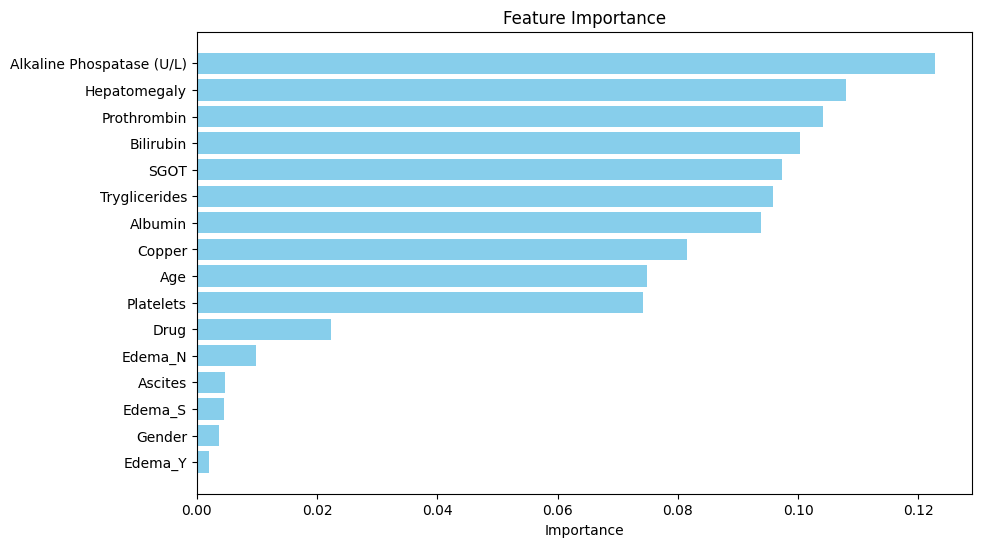

In [61]:
feature_names = x_train.columns.tolist()

# Get feature importances
feature_importances = best_RF_model.feature_importances_

# Use the DataFrame columns for feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

From the feature importance chart, it is evident that certain features play a critical role in predicting the outputs. The **most important feature** is **Alkaline Phosphatase (U/L)**, followed closely by **Hepatomegaly**, indicating their strong influence on the model’s predictions. Other **significant contributors** include **Prothrombin, Bilirubin, SGOT, Triglycerides, and, Albumin**, all of which show a notable relationship with the target variable. Features like **Copper, Age and Platelets** also have **meaningful importance**, though to a slightly lesser extent. 

In contrast, features such as **Drug, Edema_N, and Ascites** have relatively **lower importance**, while variables like **Edema_S, Gender, and Edema_Y** contribute **minimally**. These insights suggest that focusing on the most influential features can enhance the model’s efficiency, while less significant ones might be considered for exclusion to streamline the analysis.